# Bước 1 : Khai báo thư viện

In [1]:
import numpy as np #đọc dữ liệu
import pandas as pd #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu

from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import GRU #học phụ thuộc
from keras.layers import Dense #đầu ra

# Bước 2 : Đọc dữ liệu

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Máy tính\IS403\IS403_O22_HTCL_11\Dataset\AMD.csv")
df.shape

(1323, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,23.969999,24.190001,23.450001,23.680000,23.680000,48084000
1,2019-03-04,23.889999,24.129999,23.010000,23.370001,23.370001,48147700
2,2019-03-05,23.340000,23.680000,23.010000,23.500000,23.500000,35462600
3,2019-03-06,23.469999,23.530001,22.400000,22.410000,22.410000,60479400
4,2019-03-07,22.330000,22.410000,21.730000,22.080000,22.080000,52186300


# Bước 3 : Tiền xử lí dữ liệu

In [4]:
#lấy dữ liệu và gắn index với giá Close 
df1=df.reset_index()['Close']
df1

0        23.680000
1        23.370001
2        23.500000
3        22.410000
4        22.080000
           ...    
1318    166.360001
1319    171.610001
1320    165.139999
1321    166.750000
1322    166.899994
Name: Close, Length: 1323, dtype: float64

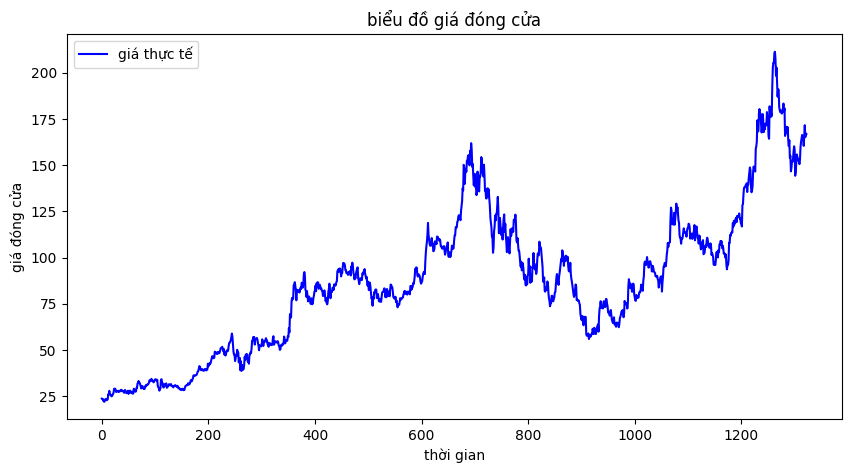

In [5]:
#lập biểu đồ giá đóng cửa 
plt.figure (figsize=(10, 5))
plt.plot(df1, label='giá thực tế', color='blue') #lập biểu đồ
plt.title('biểu đồ giá đóng cửa') #đặt tên biểu đồ
plt.xlabel('thời gian') #đặt tên hàm x 
plt.ylabel('giá đóng cửa') #đặt tên hàm y 
plt.legend() #chú thích 
plt.show()

In [6]:
#chia dữ liệu thành train và test (70% train, 30% test)
data=df1.values.reshape(-1, 1)
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

In [7]:
# Chuẩn hóa dữ liệu 
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(train_data)
sc_test = sc.fit_transform(test_data)

Làm việc với tập train

In [8]:
#tạo vòng lặp các giá trị
time_step = 100

x_train,y_train=[],[]
for i in range(time_step,len(train_data)):
  x_train.append(sc_train[i-time_step:i,0]) #lấy 100 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau 

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

# Bước 4 : Xây dựng và huấn luyện mô hình

In [11]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Huấn luyện mô hình
save_model = "save_model_7_3.keras"
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')
model.fit(x_train, y_train, epochs=50, batch_size=16, verbose=2, callbacks=[best_model])

Epoch 1/50

Epoch 1: loss improved from inf to 0.01614, saving model to save_model_7_3.keras
52/52 - 5s - 91ms/step - loss: 0.0161
Epoch 2/50

Epoch 2: loss improved from 0.01614 to 0.00100, saving model to save_model_7_3.keras
52/52 - 2s - 45ms/step - loss: 9.9834e-04
Epoch 3/50

Epoch 3: loss improved from 0.00100 to 0.00083, saving model to save_model_7_3.keras
52/52 - 2s - 44ms/step - loss: 8.2665e-04
Epoch 4/50

Epoch 4: loss improved from 0.00083 to 0.00078, saving model to save_model_7_3.keras
52/52 - 2s - 44ms/step - loss: 7.7650e-04
Epoch 5/50

Epoch 5: loss improved from 0.00078 to 0.00071, saving model to save_model_7_3.keras
52/52 - 3s - 54ms/step - loss: 7.1456e-04
Epoch 6/50

Epoch 6: loss improved from 0.00071 to 0.00065, saving model to save_model_7_3.keras
52/52 - 3s - 55ms/step - loss: 6.5246e-04
Epoch 7/50

Epoch 7: loss did not improve from 0.00065
52/52 - 2s - 45ms/step - loss: 6.6213e-04
Epoch 8/50

Epoch 8: loss improved from 0.00065 to 0.00063, saving model to s

In [13]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("save_model_7_3.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #chuyển về sô liệu thực

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


# Bước 5 : Sử dụng mô hình

In [14]:
# Chuẩn bị dữ liệu để đưa vào model 
x_test = []
for i in range(time_step ,test_data.shape[0]):
  x_test.append(sc_test[i-time_step:i,0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test_predict = final_model.predict(x_test) # dự đoán giá đóng cửa trên tập đã test
y_test_predict = sc.inverse_transform(y_test_predict) #chuyển về số liệu thực

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# Bước 6 : Dự báo tương lai và đánh giá

In [15]:
# Dự báo 30 ngày tới
temp_input = list(sc_test[-time_step:].flatten())  # Lấy 100 giá trị cuối cùng từ dữ liệu test đã chuẩn hóa
n_steps = time_step
i = 0
lst_output_30_days = []

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_30_days.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_30_days.extend(yhat.tolist())
        i += 1

# Chuyển đổi giá trị dự báo về giá trị gốc
lst_output_30_days = sc.inverse_transform(lst_output_30_days)

In [16]:
# Dự báo 60 ngày tới
temp_input = list(sc_test[-time_step:].flatten())  # Lấy 100 giá trị cuối cùng từ dữ liệu test đã chuẩn hóa
n_steps = time_step
i = 0
lst_output_60_days = []

while i < 60:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_60_days.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_60_days.extend(yhat.tolist())
        i += 1

# Chuyển đổi giá trị dự báo về giá trị gốc
lst_output_60_days = sc.inverse_transform(lst_output_60_days)

In [17]:
# Dự báo 90 ngày tới
temp_input = list(sc_test[-time_step:].flatten())  # Lấy 100 giá trị cuối cùng từ dữ liệu test đã chuẩn hóa
n_steps = time_step
i = 0
lst_output_90_days = []

while i < 90:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_90_days.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = final_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output_90_days.extend(yhat.tolist())
        i += 1

# Chuyển đổi giá trị dự báo về giá trị gốc
lst_output_90_days = sc.inverse_transform(lst_output_90_days)
print(lst_output_90_days)

[[167.28080807]
 [167.64179674]
 [168.00111927]
 [168.35896685]
 [168.71251705]
 [169.06085031]
 [169.40351141]
 [169.74028182]
 [170.07106139]
 [170.39586834]
 [170.71466625]
 [171.02750975]
 [171.33445346]
 [171.63550648]
 [171.93078718]
 [172.22025915]
 [172.5039861 ]
 [172.78204088]
 [173.05447812]
 [173.32134333]
 [173.58270026]
 [173.83858532]
 [174.08906223]
 [174.33421296]
 [174.57403748]
 [174.80864506]
 [175.03808123]
 [175.26241881]
 [175.48174886]
 [175.69606227]
 [175.90549561]
 [176.11005798]
 [176.30983132]
 [176.50490669]
 [176.69529319]
 [176.88106364]
 [177.0622818 ]
 [177.239066  ]
 [177.41143447]
 [177.57949647]
 [177.7432975 ]
 [177.90291952]
 [178.05843536]
 [178.20990875]
 [178.35739432]
 [178.50100133]
 [178.64072977]
 [178.77672533]
 [178.90900621]
 [179.03767255]
 [179.16275168]
 [179.28434374]
 [179.40249426]
 [179.51729429]
 [179.62878023]
 [179.73703404]
 [179.84212855]
 [179.94410929]
 [180.04304908]
 [180.13906629]
 [180.23215182]
 [180.32238761]
 [180.40

In [18]:
y_test_predict.shape

(297, 1)

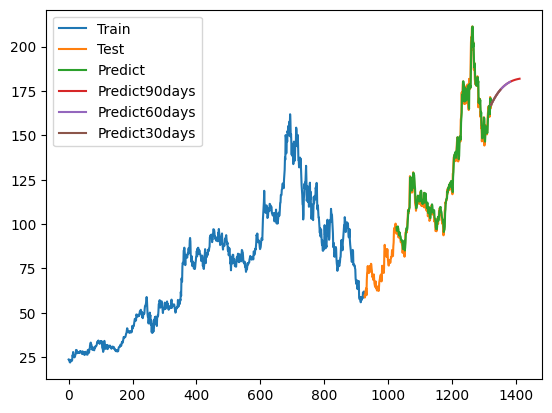

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, train_data)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+len(test_data), step=1)
plt.plot(test_data_index,test_data)

test_data_index = pd.RangeIndex(start=train_size+time_step, stop=train_size+len(test_data), step=1)
plt.plot(test_data_index, y_test_predict)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index, lst_output_90_days)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index, lst_output_60_days)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index, lst_output_30_days)

plt.legend(['Train','Test','Predict', 'Predict90days', 'Predict60days', 'Predict30days'])
plt.show()

In [21]:
# Hệ số đánh giá RMSE, MAE, MAPE
def evaluate_forecast(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return rmse, mae, mape

y_true = test_data[100:]
y_pred = y_test_predict

rmse_score, mae_score, mape_score = evaluate_forecast(y_true, y_pred)

print("RMSE:", rmse_score)
print("MAE:", mae_score)
print("MAPE:", mape_score, "%")

RMSE: 4.115741509639267
MAE: 2.952514211609914
MAPE: 2.2616056229983132 %
